# DSE 2262 MACHINE LEARNING LABORATORY


## Week 2 - EXER 1:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.



### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### 1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pima-indians-diabetes (1).csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


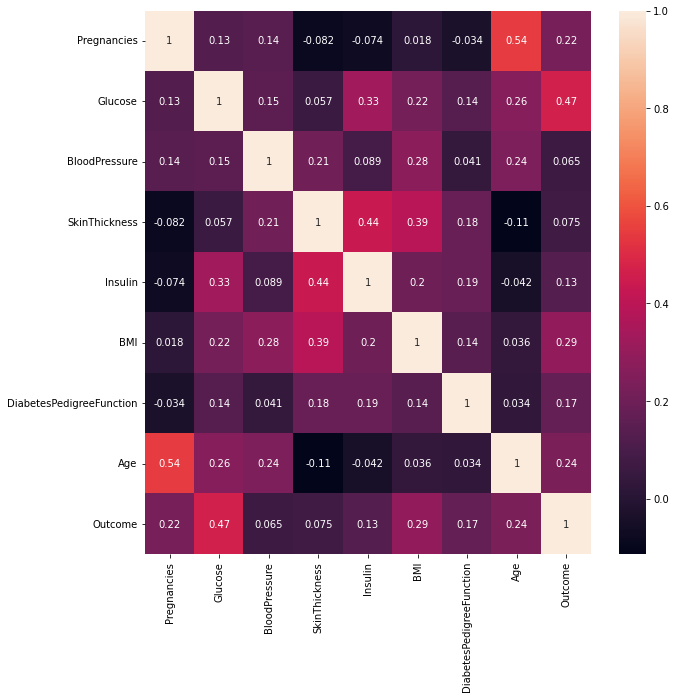

In [4]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True)

### 2. Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [5]:
df_age = df['Age']

In [6]:
df_age.mean()

33.240885416666664

In [7]:
df_age.std()

11.76023154067868

In [8]:
df_age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

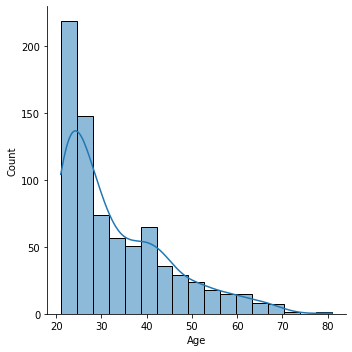

In [9]:
sns.displot(data=df, x="Age", kde=True)

### 3. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

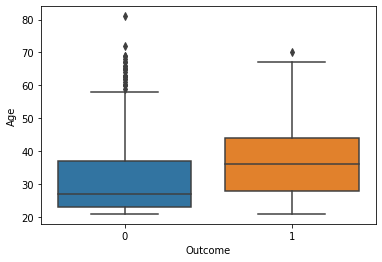

In [10]:
ax = sns.boxplot(x="Outcome", y="Age", data=df)

- People having detected positive with diabetes are genreally older than people without diabetes.
- Mean of Positive-0 >> Mean of Negative-0
- Proved by below skewed graph

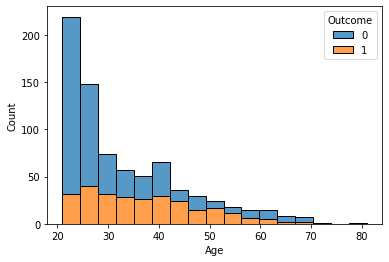

In [11]:
sns.histplot(
    df,
    x="Age", hue="Outcome",
    multiple="stack",
)

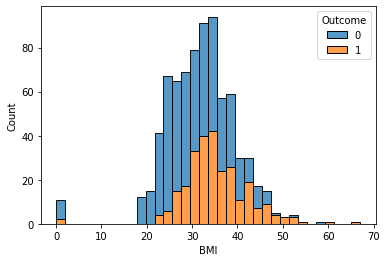

In [13]:
sns.histplot(
    df,
    x="BMI", hue="Outcome",
    multiple="stack",
)

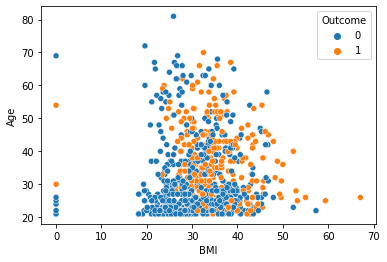

In [14]:
sns.scatterplot(data=df, x="BMI", y="Age", hue="Outcome")

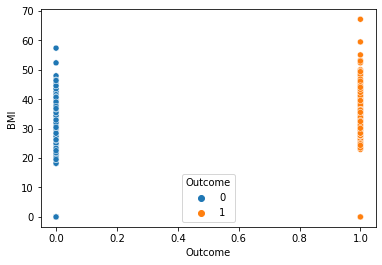

In [30]:
sns.scatterplot(data=df, x="Outcome", y="BMI", hue="Outcome")

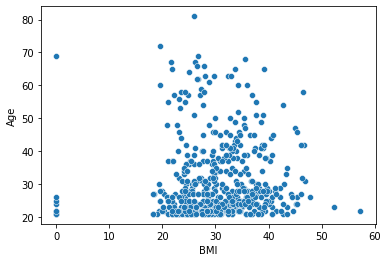

In [15]:
sns.scatterplot(data=df[df["Outcome"]==0], x="BMI", y="Age")

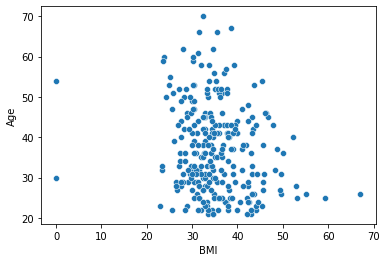

In [16]:
sns.scatterplot(data=df[df["Outcome"]==1], x="BMI", y="Age")

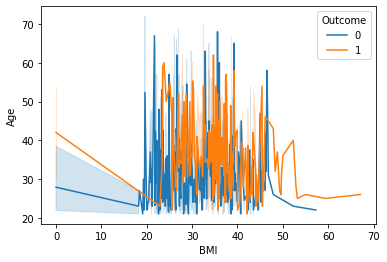

In [17]:
sns.lineplot(x="BMI", y="Age",hue = 'Outcome',data=df)

### 4. Tabulate the class label and comment on whether the classes are balanced.

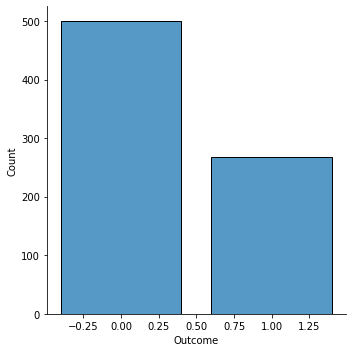

In [18]:
sns.displot(df, x="Outcome", shrink=.8,discrete=True,kind='hist',legend=True)

There is class imbalance in the dataset with 2 times negative case / training samples than positive samples.

### 5. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
y = df['Outcome']

In [21]:
X = df.drop(['Outcome'],axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

In [24]:
logreg = LogisticRegression( max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
logreg.score(X_test,y_test)

0.7359307359307359

### 6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [26]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
y_pred = logreg.predict(X_test)
print('confusion matrix :\n',confusion_matrix(y_test,y_pred))
print('precision_score :\n',precision_score(y_test,y_pred,pos_label=1))
print('recall_score :\n',recall_score(y_test,y_pred,pos_label=1))
print('classification_report :\n',classification_report(y_test,y_pred))


confusion matrix :
 [[120  31]
 [ 30  50]]
precision_score :
 0.6172839506172839
recall_score :
 0.625
classification_report :
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



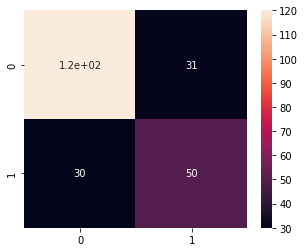

In [27]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

### 7. Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [28]:
confusion_matrix1 = confusion_matrix(y_test,y_pred)
FN = confusion_matrix1[0][1]
FP = confusion_matrix1[1][0]
TP = confusion_matrix1[1][1]
TN = confusion_matrix1[0][0]
TPR = TP/(TP+FN)
TNR = TN /(TN+FP)
FPR=1-TPR
FNR=1-TNR
print("True Positive Rate -"+str(TPR))
print("True Negative Rate -"+str(TNR))
print("False Positive Rate -"+str(FPR))
print("False Negative Rate -"+str(FNR))

True Positive Rate -0.6172839506172839
True Negative Rate -0.8
False Positive Rate -0.3827160493827161
False Negative Rate -0.19999999999999996


- The False Positive and Negative Rates are high with false positive being 0.38 greater than false negative 0.2. 
- Model is more likely to wrongly predict as positive than negative which might cause a hassel but can be prevented by intervention of professional. 
- However still false negative is too high which might be dangerous in this field.

### 8. Visualize the ROC curve, and comment on the performance of the classifier.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


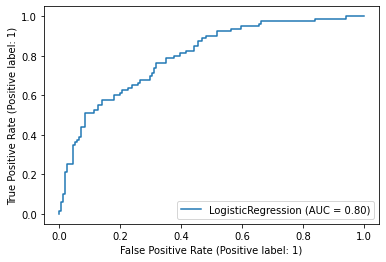

In [29]:
from sklearn import metrics
metrics.plot_roc_curve(logreg, X_test, y_test) 

Since AUC Score is 0.8  and graph is upward similar log graph .We can say classifier is good enough for predicting diabetes in this scenario.